In [1]:
library("igraph")

m = 2;

edgeList = matrix(c(1,2), ncol=2, nrow=1)
g <- graph(edgeList, directed = FALSE);

edgesAdded <- m;


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [2]:
addNodes <- function(g,m){

    nodeCount = vcount(g);
    nodeIndexesRandom = sample(1:nodeCount);
    
    if(edgesAdded >= m) {
        edgesAdded <<- 0;
        g <- add_vertices(g, 1);
        nodeCount = nodeCount+1;
    }
    indexToAdd = nodeCount;

    edgeDegrees = degree(g);

    if(edgesAdded > 0) {
        nodeIndexesRandom = nodeIndexesRandom[nodeIndexesRandom != indexToAdd];
        edgeDegrees = edgeDegrees[-indexToAdd];
    }
    
    nodeIndexesWithoutEdge = c()
    for(index in nodeIndexesRandom) {
        if(!are.connected(g, indexToAdd, index)) {
            nodeIndexesWithoutEdge = c(nodeIndexesWithoutEdge, index);
        }
    }
        
    for(index in nodeIndexesWithoutEdge) {
        #print(sprintf("Considering edge %d->%d", indexToAdd, index))
        edgeProbability = edgeDegrees[index]/sum(edgeDegrees);
        #print(sprintf("Probability to add %f", edgeProbability))
        toAddTrial <- runif(n=1, min=0, max=1);
        if (toAddTrial <= edgeProbability) {
            #print("Adding")
            g <- add_edges(g, c(indexToAdd, index));
            edgesAdded <<- edgesAdded + 1;
        } else {
            #print("Not adding")
        }
        
        if (edgesAdded >= m || nodeCount < m) {
            break;
        }
    }
    
    (g)
}

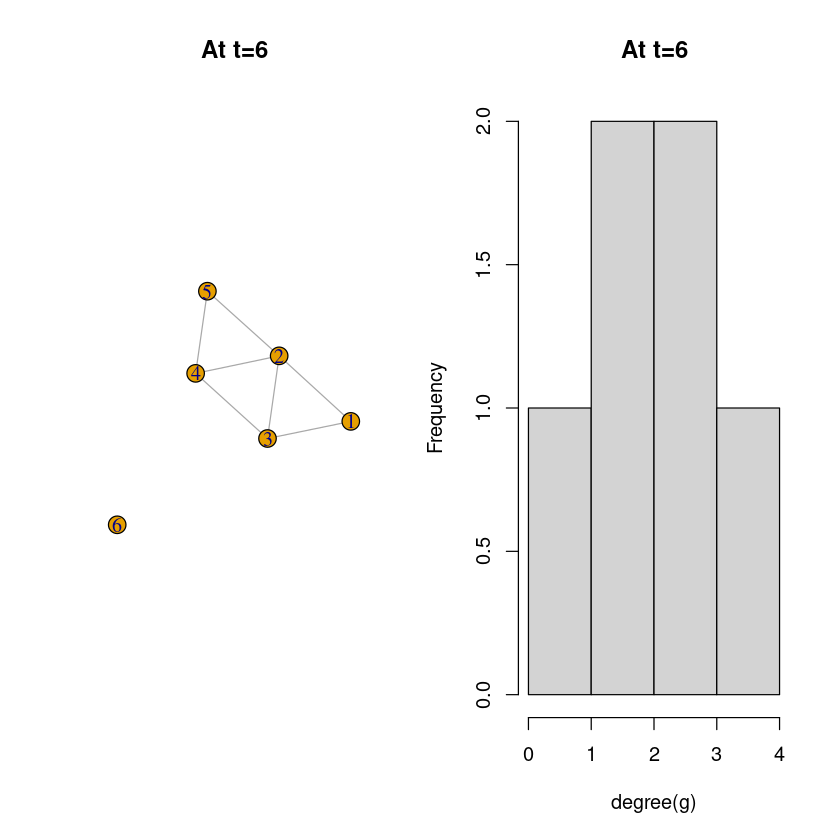

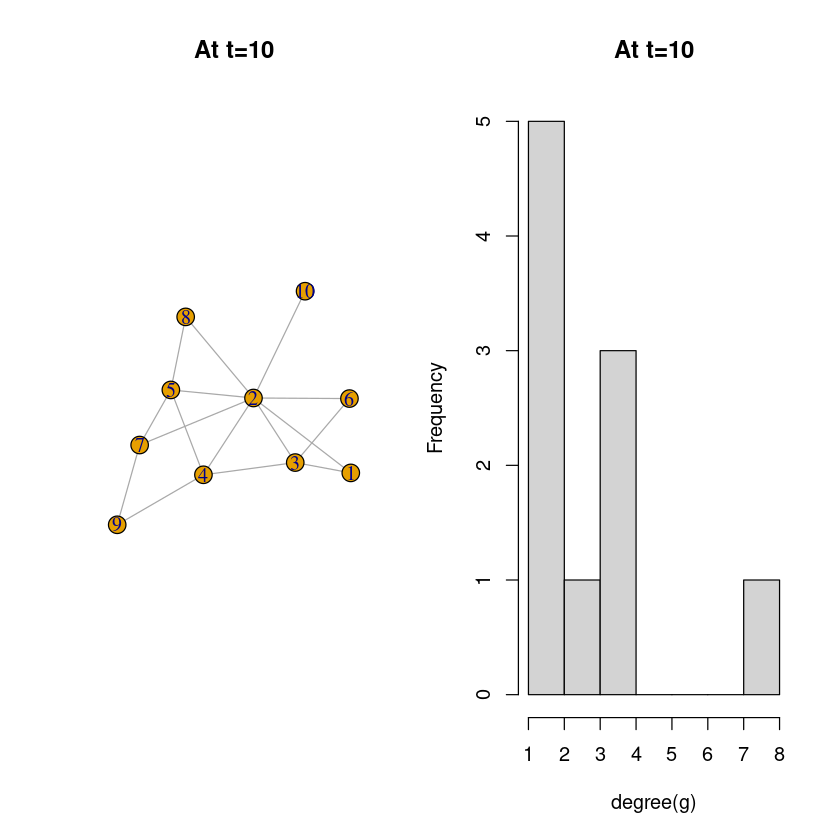

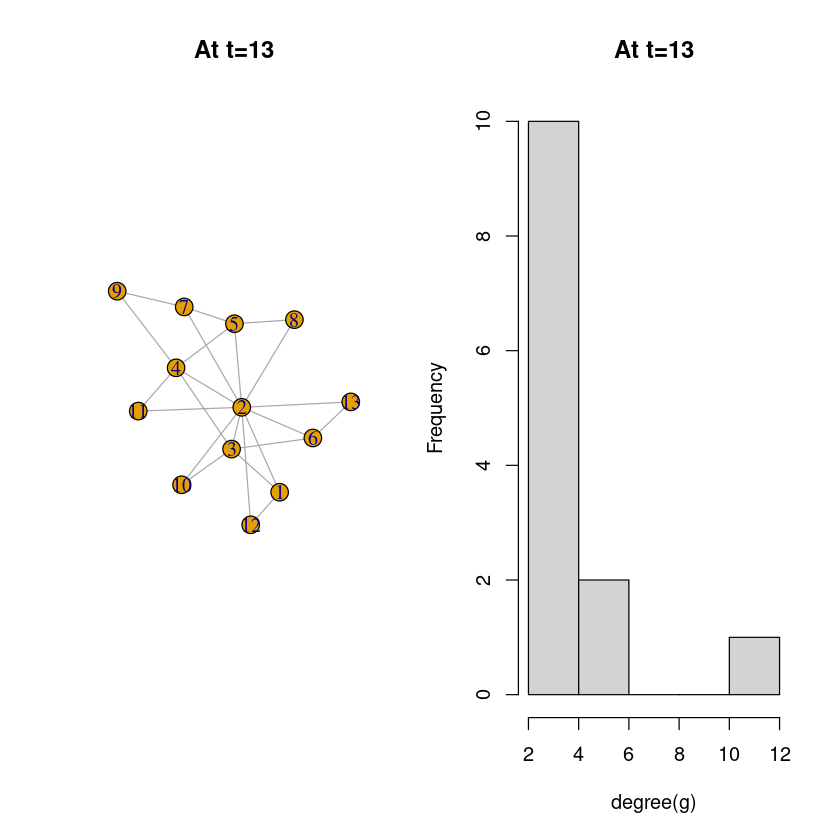

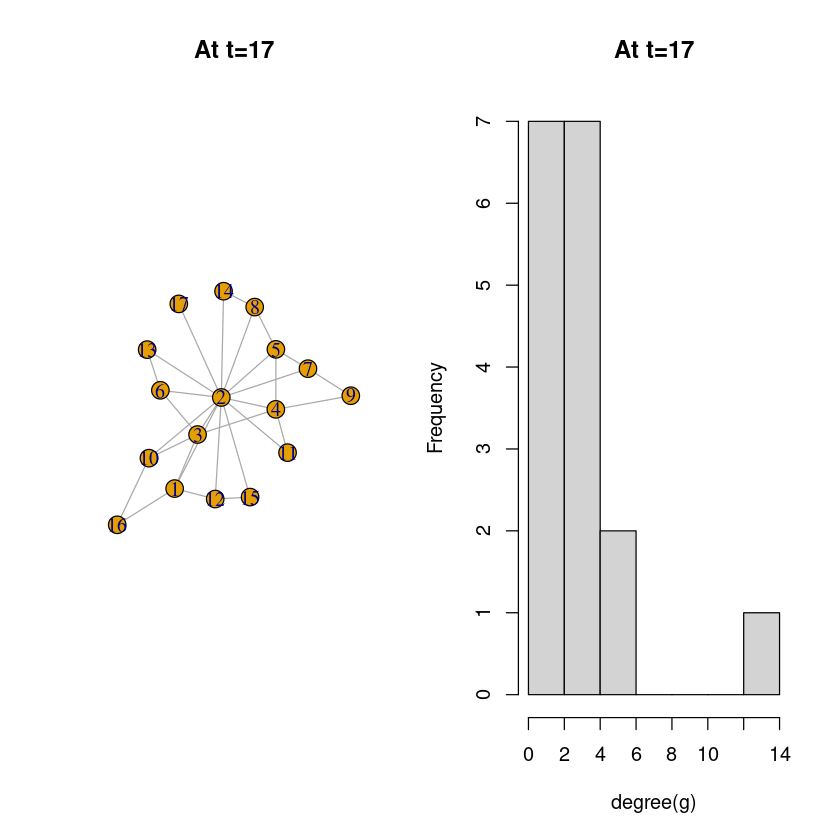

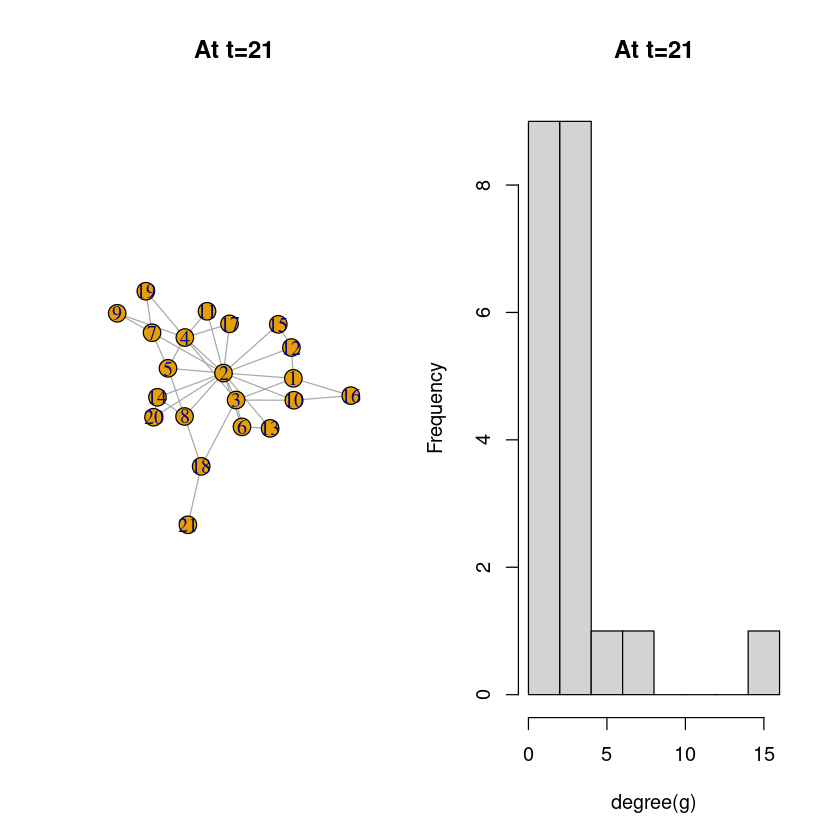

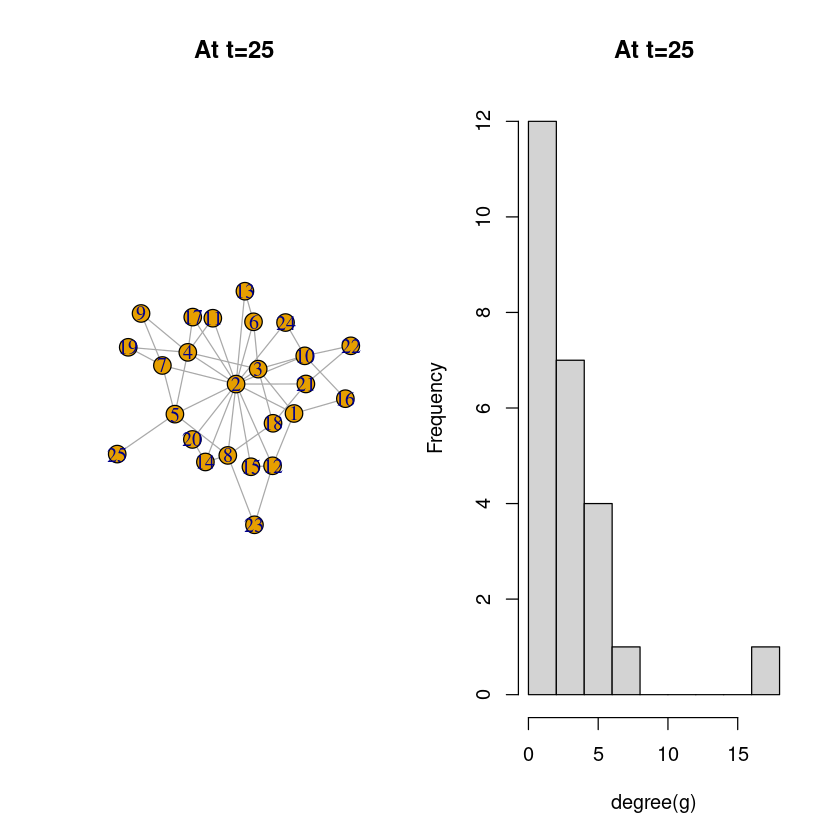

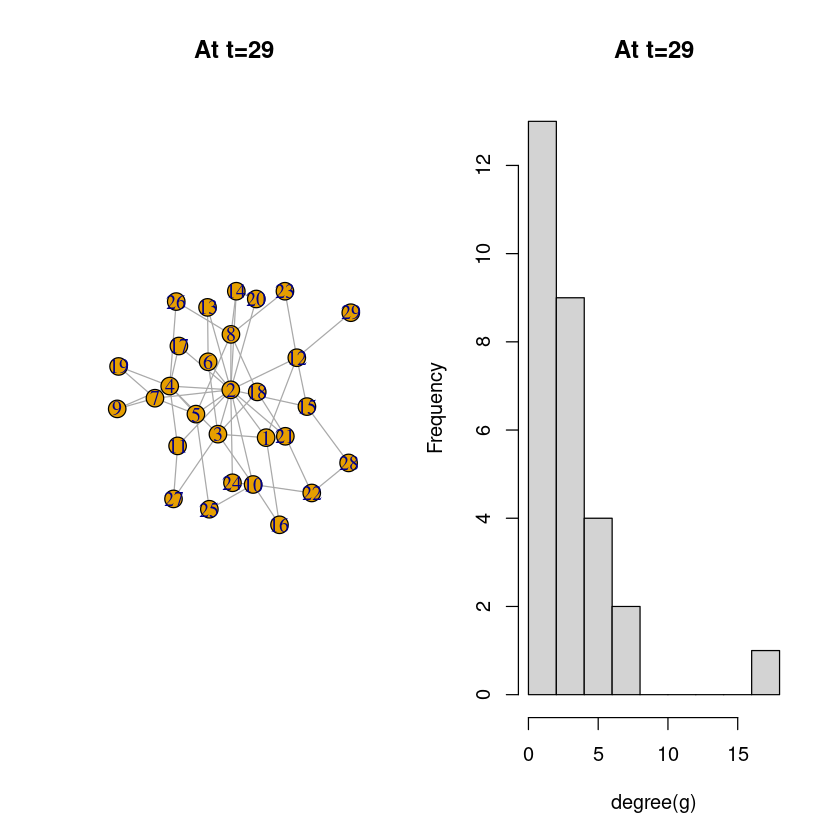

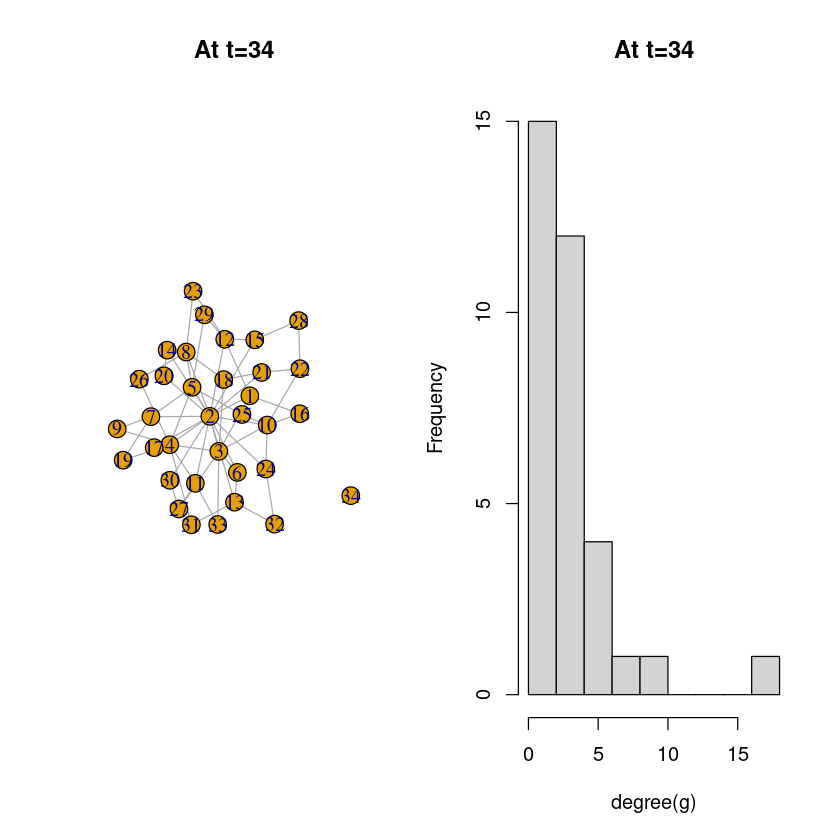

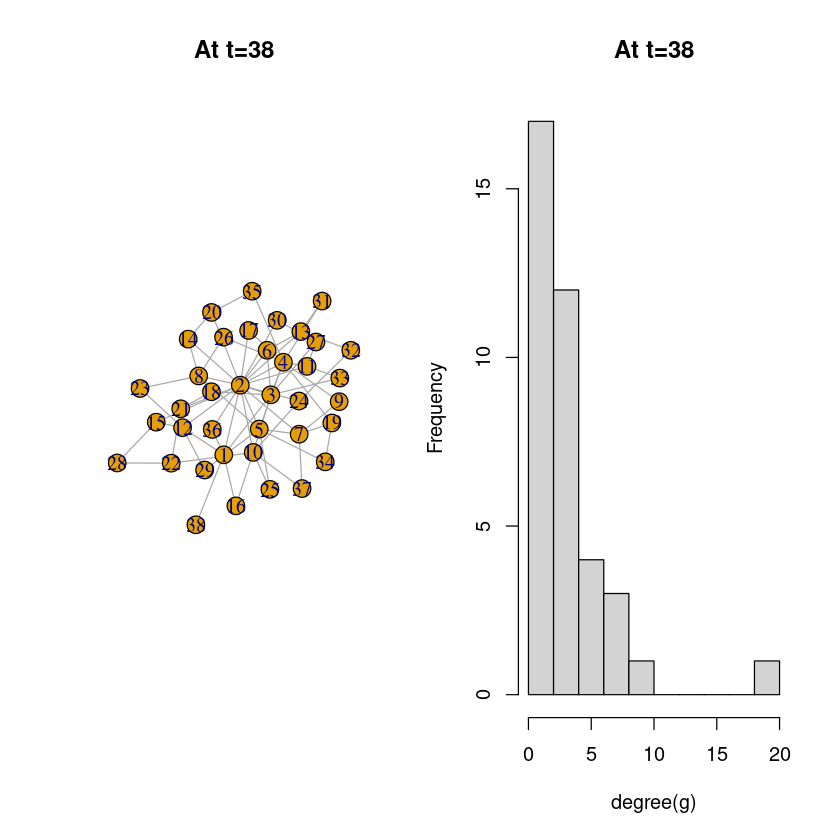

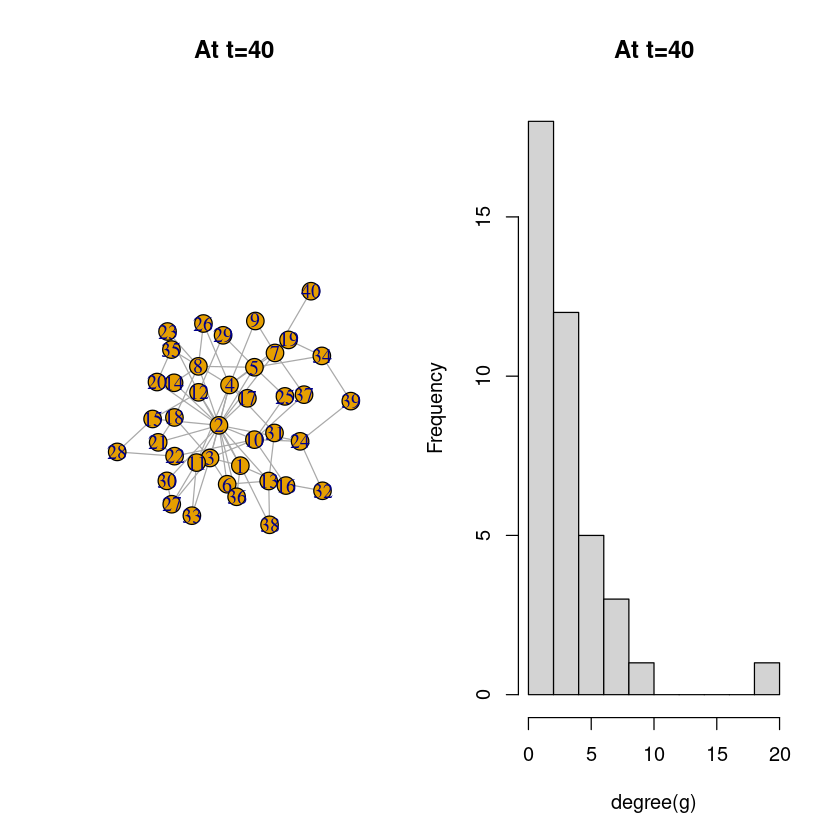

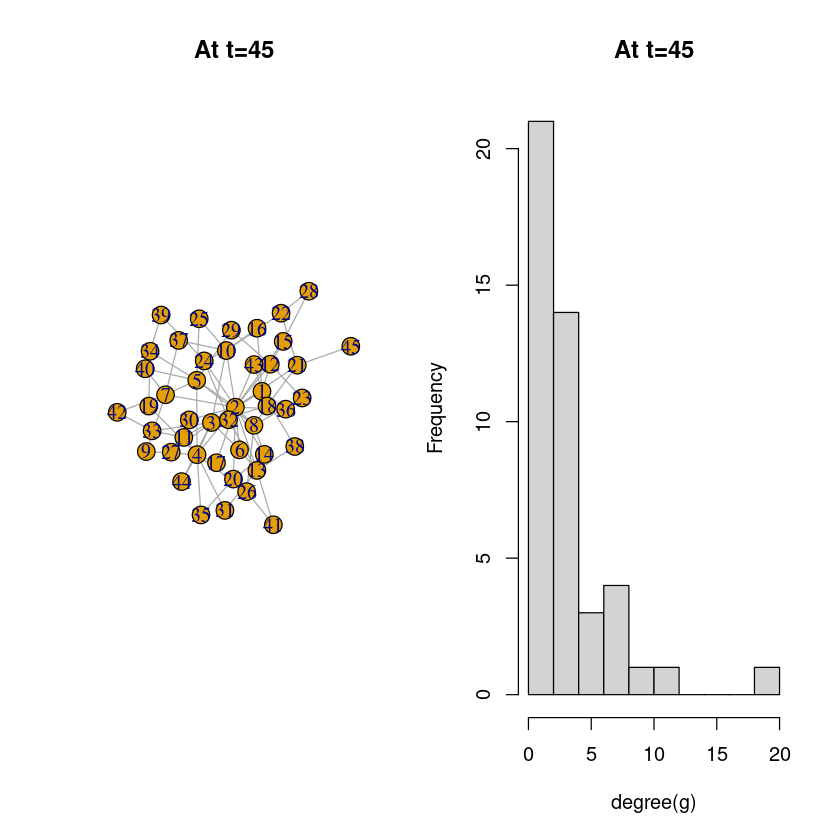

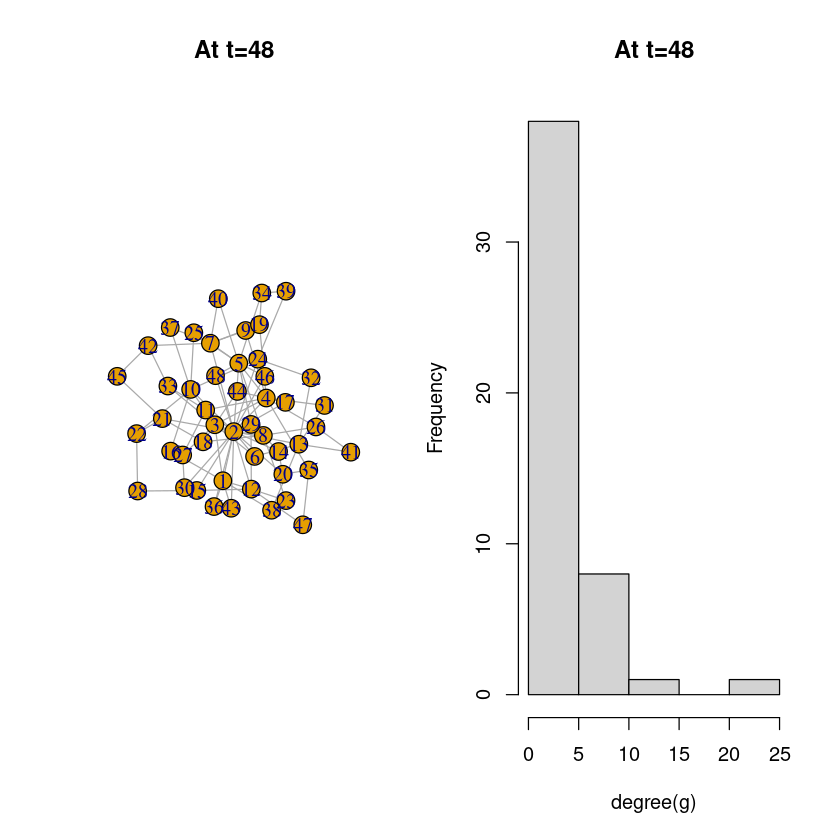

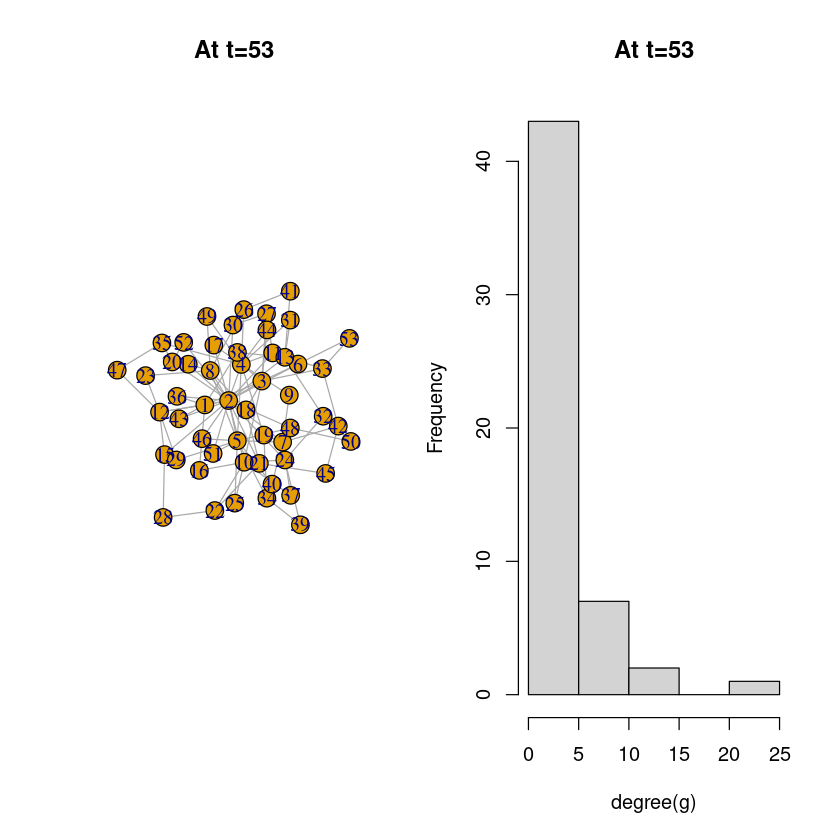

In [3]:
tPeriods=5;
periodLength = 10;
while (vcount(g) < tPeriods*periodLength) {
    for (t in 1:periodLength) {
        g = addNodes(g, m);
    }
    par(mfrow = c(1, 2));
    nodeCount = vcount(g)
    plot(g, main=sprintf("At t=%d", nodeCount));
    hist(degree(g), main=sprintf("At t=%d", nodeCount));
}